## Code cài đặt thuật toán:

In [2]:
class Item:
    def __init__(self, name, value, weight):
        self.name = name
        self.value = value
        self.weight = weight
    
    def __str__(self):
        return f'{self.name} - V:{self.value}, W:{self.weight}'

class Knapsack:
    def __init__(self, max_weight):
        self.max_weight = max_weight
        self.items = []
        self.total_value = 0
        self.total_weight = 0
    
    def add_item(self, item):
        if item.weight + self.total_weight <= self.max_weight:
            self.items.append(item)
            self.total_value += item.value
            self.total_weight += item.weight
            
    def __str__(self):
        items_str = '\n'.join([f'   - {item}' for item in self.items])
        return f'Total Value: {self.total_value}\nTotal Weight: {self.total_weight}\nItems:\n{items_str}'

class GBFS:
    def __init__(self, items, max_weight):
        self.knapsack = Knapsack(max_weight)
        self.remaining_items = sorted(items, key=lambda x:x.value / x.weight, reverse=True)
        
    def search(self):
        while len(self.remaining_items) > 0:
            next_item = self.remaining_items[0]
            if next_item.weight <= self.knapsack.max_weight - self.knapsack.total_weight:
                self.knapsack.add_item(next_item)
                self.remaining_items.remove(next_item)
            else:
                break
        return self.knapsack

## Code tạo danh sách vật phẩm tình huống 1 và hiển thị kết quả

In [ ]:
# Trọng lượng tối đa
max_weight = 15
# Tạo danh sách các vật phẩm trường hợp 1
items = [Item('A', 60, 10),  Item('B', 50, 8),  Item('C', 40, 4), Item('D', 24, 3), Item('E', 10, 5),  Item('F', 25, 4)]
# In kết quả trường hợp 1
print('Kết quả trường hợp 1:')
gbfs = GBFS(items, max_weight)
result = gbfs.search()
print(result, '\n')

# Tạo danh sách các vật phẩm trường hợp 2
items = [Item('A', 60, 10), Item('F', 25, 4), Item('B', 50, 8), Item('C', 40, 4), Item('D', 24, 3), Item('E', 10, 5)]
# In kết quả trường hợp 2
print('Kết quả trường hợp 2:')
gbfs = GBFS(items, max_weight)
result = gbfs.search()
print(result)

Kết quả trường hợp 1:
Total Value: 114
Total Weight: 15
Items:
   - C - V:40, W:4
   - D - V:24, W:3
   - B - V:50, W:8 

Kết quả trường hợp 2:
Total Value: 89
Total Weight: 11
Items:
   - C - V:40, W:4
   - D - V:24, W:3
   - F - V:25, W:4


## Code tạo danh sách vật phẩm tình huống 2 và in kết quả:

average time of best case= 0.0002129077911376953
average time of average case= 0.0002506375312805176
average time of worst case= 0.00031769275665283203


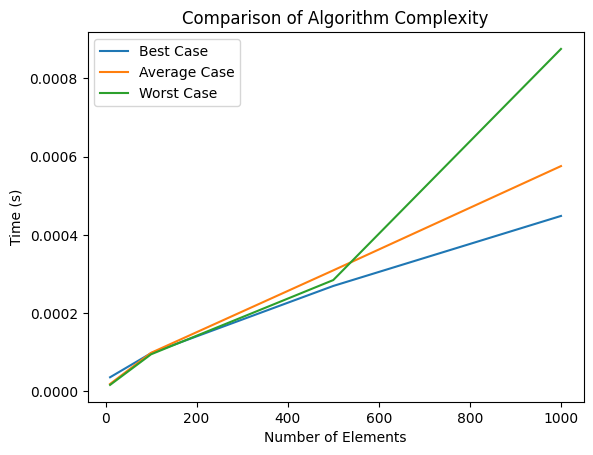

In [46]:
import matplotlib.pyplot as plt
import time
import random

# Tạo list chứa số lượng phần tử tăng dần từ 10 đến 1000
n_list = [10, 100, 500, 1000]

# Tạo list chứa thời gian thực thi của 3 trường hợp khác nhau
best_case_time = []
average_case_time = []
worst_case_time = []
class Item:
    def __init__(self, weight, value):
        self.weight = weight
        self.value = value

def generate_items(num_items, value_range, weight_range):
    items = [(random.randint(1, value_range), random.randint(1, weight_range)) for i in range(num_items)]
    return [Item(weight=item[0], value=item[1]) for item in items]


# Tính thời gian thực thi cho từng trường hợp
for n in n_list:
    # Tạo danh sách gồm n vật phẩm ngẫu nhiên với giá trị từ 1 đến 20 và trọng lượng cũng từ 1 đến 20
    items = generate_items(n, 20, 20)
    # Tạo trọng lượng tối đa là 150
    max_weight = 150
    # Tạo danh sách được sắp xếp giảm dần cho trường hợp trung bình
    items_best=sorted(items, key=lambda x: x.value / x.weight, reverse=True)

    # Tạo danh sách được sắp xếp ngẫu nhiên cho trường hợp trung bình
    items_average = items

    # Tạo danh sách 1000 vật phẩm với giá trị thấp và trọng lượng nặng
    items_worst=sorted(items, key=lambda x: x.value / x.weight, reverse=False)

    # Code thuật toán cho trường hợp tốt nhất ở đây
    start = time.time()
    gbfs1=GBFS(items_best, max_weight)
    gbfs1.search()
    end = time.time()
    best_case_time.append(end - start)
    
    # Tính thời gian cho trường hợp trung bình
    start2 = time.time()
    gbfs2=GBFS(items_average, max_weight)
    gbfs2.search()
    end2 = time.time()
    average_case_time.append(end2 - start2)
    
    # Tính thời gian cho trường hợp xấu nhất
    start3 = time.time()
    gbfs3=GBFS(items_worst, max_weight)
    gbfs3.search()
    end3 = time.time()
    worst_case_time.append(end3 - start3)

print('average time of best case=', sum(best_case_time)/len(best_case_time))
print('average time of average case=', sum(average_case_time)/len(average_case_time))
print('average time of worst case=', sum(worst_case_time)/len(worst_case_time))
# Vẽ biểu đồ đường so sánh thời gian thực thi của các trường hợp khác nhau
plt.plot(n_list, best_case_time, label='Best Case')
plt.plot(n_list, average_case_time, label='Average Case')
plt.plot(n_list, worst_case_time, label='Worst Case')
plt.xlabel('Number of Elements')
plt.ylabel('Time (s)')
plt.title('Comparison of Algorithm Complexity')
plt.legend()
plt.show()

## Code tạo giao diện cho bài toán:

In [ ]:
import tkinter as tk
from tkinter import messagebox
from typing import List


class KnapsackGUI(tk.Frame):
    def __init__(self, master=None):
        super().__init__(master)
        self.master = master
        self.master.title("Knapsack Problem")
        
        # create UI elements
        self.max_weight_label = tk.Label(self.master, text="Max Weight:")
        self.max_weight_entry = tk.Entry(self.master, width=10)
        
        self.item_frame = tk.Frame(self.master)
        self.item_name_label = tk.Label(self.item_frame, text="Name:")
        self.item_name_entry = tk.Entry(self.item_frame, width=10)
        self.item_value_label = tk.Label(self.item_frame, text="Value:")
        self.item_value_entry = tk.Entry(self.item_frame, width=10)
        self.item_weight_label = tk.Label(self.item_frame, text="Weight:")
        self.item_weight_entry = tk.Entry(self.item_frame, width=10)
        
        self.add_button = tk.Button(self.master, text="Add Item", command=self.add_item)
        self.delete_button = tk.Button(self.master, text="Delete Item", command=self.delete_item)
        self.run_button = tk.Button(self.master, text="Run", command=self.run_algorithm)
        
        self.result_label = tk.Label(self.master, text="Result:")
        self.result_text = tk.Text(self.master, height=10, width=40)
        
        # arrange UI elements using grid layout
        self.max_weight_label.grid(row=0, column=0)
        self.max_weight_entry.grid(row=0, column=1)
        
        self.item_name_label.grid(row=0, column=0)
        self.item_name_entry.grid(row=0, column=1)
        self.item_value_label.grid(row=0, column=2)
        self.item_value_entry.grid(row=0, column=3)
        self.item_weight_label.grid(row=0, column=4)
        self.item_weight_entry.grid(row=0, column=5)
        self.item_frame.grid(row=1, column=0, columnspan=2, padx=10, pady=5)
        
        self.add_button.grid(row=2, column=0)
        self.delete_button.grid(row=2, column=1)
        self.run_button.grid(row=3, column=1)
        
        self.result_label.grid(row=4, column=0)
        self.result_text.grid(row=5, column=0, columnspan=2, padx=10, pady=5)
        
        # create data model objects
        self.items = []
        self.knapsack = None
    
    def add_item(self):
        name = self.item_name_entry.get()
        value = float(self.item_value_entry.get())
        weight = float(self.item_weight_entry.get())
        self.items.append(Item(name, value, weight))
        self.item_name_entry.delete(0, tk.END)
        self.item_value_entry.delete(0, tk.END)
        self.item_weight_entry.delete(0, tk.END)
        self.show_items()
        
    def delete_item(self):
        if len(self.items) > 0:
            self.items.pop()
            self.show_items()
        else:
            messagebox.showerror("Error", "No item to delete")
    
    def show_items(self):
        items_str = ""
        for item in self.items:
            items_str += f"{item}\n"
        self.result_text.delete(1.0, tk.END)
        self.result_text.insert(tk.END, items_str)
        
    def run_algorithm(self):
        max_weight = float(self.max_weight_entry.get())
        if float(max_weight) <= 0:
            messagebox.showerror("Error", "Max weight must be greater than 0")
            return
        if len(self.items) == 0:
            messagebox.showerror("Error", "No items to pack")
            return
        # Create instance of GBFS solver with items and max weight
        solver = GBFS(self.items, max_weight)

        # Solve and display solution
        solution = solver.search()
        self.result_label.config(text=str(solution))


root = tk.Tk()
app = KnapsackGUI(master=root)
app.mainloop()